In [ ]:
#
#   Autor: Flávio Andrade dos Santos
#   Curso: Ciência de Dados e Analytics (PUC-RIO)
#   Data: 10/12/2024
#
#   Definição do Problema
#
#       A previsão de preços de imóveis é uma tarefa extremamente importante no setor imobiliário. As previsões com precisão auxiliam compradores e vendedores
#   na tomada de decisão. Neste trabalho, utilizaremos técnicas avançadas de regressão para prever preços dos imóveis.
#       A previsão do preço de venda de imóveis envolve a análise de diversas características que influenciam os preços. Com a utilização de técnicas avançadas
#   de regressão, podemos criar modelos que prevêem com precisão os preços das casas.
#       Definição do Problema:
#       O objetivo é prever o preço de venda de casas usando o conjunto de dados "Kaggle para House Prices - Advanced Regression Techniques". Tal dataset
#   contém 79 variáveis explicativas que descrever vários aspectos de residências em Ames, Iowa. A variável alvo é SalePrice.
#
#
#   Inclui informações sobre hábitos de estudo, frequência, envolvimento dos pais e outros aspectos que influenciam o sucesso acadêmico.
#   Link do dataset:
#   https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?resource=download
#
#   Atributos e descrição:
#   Hours_studied               Número de horas dedicadas ao estudo por semana.
#   Attendance                  Porcentagem de aulas assistidas.
#   Parental_Involvement        Nível de envolvimento parental na educação do estudante (Low, Medium, High).
#   Access_to_Resources	        Disponibilidade de recursos educacionais (Low, Medium, High).
#   Extracurricular_Activities	Participação em atividades extracurriculares (Yes, No).
#   Sleep_Hours	Average         Média de horas de sono por noite.
#   Previous_Scores             Notas de exames anteriores.
#   Motivation_Level            Nível de motivação do estudante (Low, Medium, High).
#   Internet_Access             Disponibilidade de acesso a internet (Yes, No).
#   Tutoring_Sessions           Número de sessões de tutoria frequentadas por mês.
#   Family_Income               Nível de renda familiar (Low, Medium, High).
#   Teacher_Quality             Qualidade dos professores (Low, Medium, High).
#   School_Type                 Tipo de escola frequentada (Public, Private).
#   Peer_Influence              Influencia dos colegas no desempenho acadêmico (Positive, Neutral, Negative).
#   Physical_Activity           Número médio de horas de atividade física por semana.
#   Learning_Disabilities       Presença de dificuldades na aprendizagem (Yes, No).
#   Parental_Education_Level    Nível de escolaridade mais alto dos pais (High School, College, Postgraduate).
#   Distance_from_Home          Distância de cada até a escola (Near, Moderate, Far).
#   Gender                      Gênero do estudante (Male, Female).
#   Exam_Score                  Nota do exame final.
#

In [1]:
#
#   Exploração dos Dados
#
#   Importação das bibliotecas
#
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# importação do Seaborn
import seaborn as sns
import missingno as ms # para tratamento de missings
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
## Transformações Categóricas
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding
#
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")
#
#   Carregamento do dataset
#
print("Iniciando a fase ETL: ")
print("Lendo o dataset: ")
dataset = "https://raw.githubusercontent.com/fasantosgh/MVP_AnaliseDados/refs/heads/main/StudentPerformanceFactors.csv"
stdperf = pd.read_csv(dataset, sep=",")
stdperf.head()

Iniciando a fase ETL: 
Lendo o dataset: 


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [2]:
#
#   Verficando as dimensões do dataset (20 colunas e 6607 linhas)
#   Encontramos 6607 instâncias e 20 atributos
#   São 7 variáveis numéricas e 13 categóricas
#
stdperf.shape

(6607, 20)

In [ ]:
#
# Exibindo últimas linhas
#
stdperf.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [ ]:
#
#   Exibindo os nomes das colunas
#
stdperf.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
#
#   Verificando os tipos de cada coluna do dataframe
#
stdperf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
# exibindo a quantidade de linhas por coluna
stdperf.count()

,0
Hours_Studied,6607
Attendance,6607
Parental_Involvement,6607
Access_to_Resources,6607
Extracurricular_Activities,6607
Sleep_Hours,6607
Previous_Scores,6607
Motivation_Level,6607
Internet_Access,6607
Tutoring_Sessions,6607


In [ ]:
#
#   Detalhamento dos atributos categóricos
#
stdperf.select_dtypes('object').describe().transpose()

,count,unique,top,freq
Parental_Involvement,6607,3,Medium,3362
Access_to_Resources,6607,3,Medium,3319
Extracurricular_Activities,6607,2,Yes,3938
Motivation_Level,6607,3,Medium,3351
Internet_Access,6607,2,Yes,6108
Family_Income,6607,3,Low,2672
Teacher_Quality,6529,3,Medium,3925
School_Type,6607,2,Public,4598
Peer_Influence,6607,3,Positive,2638
Learning_Disabilities,6607,2,No,5912


In [ ]:
#
#   Detalhamento dos atributos numéricos
#
stdperf.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [ ]:
# função com estatisticas sobre colunas com dados faltantes

def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if stdperf[col].isna().any():
      qtd, _ = df[stdperf[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [ ]:
stats_dados_faltantes(df=stdperf)

{'Teacher_Quality': {'quantidade': 78, 'porcentagem': 1.18}}
{'Parental_Education_Level': {'quantidade': 90, 'porcentagem': 1.36}}
{'Distance_from_Home': {'quantidade': 67, 'porcentagem': 1.01}}


In [ ]:
#
#   Exibindo Sumário estatístico
#
#   Observamos que todas as variáveis quantitativas são discretas.
#   A variável Exam_Score apresenta uma inconsistência. Possui um valor acima
#   de 100.
#
stdperf.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
#
#   Verificação da distribuição da variável Exam_Score
#
stdperf['Exam_Score'].describe().round(2)

,Exam_Score
count,6607.00
mean,67.24
std,3.89
min,55.00
25%,65.00
50%,67.00
75%,69.00
max,101.00


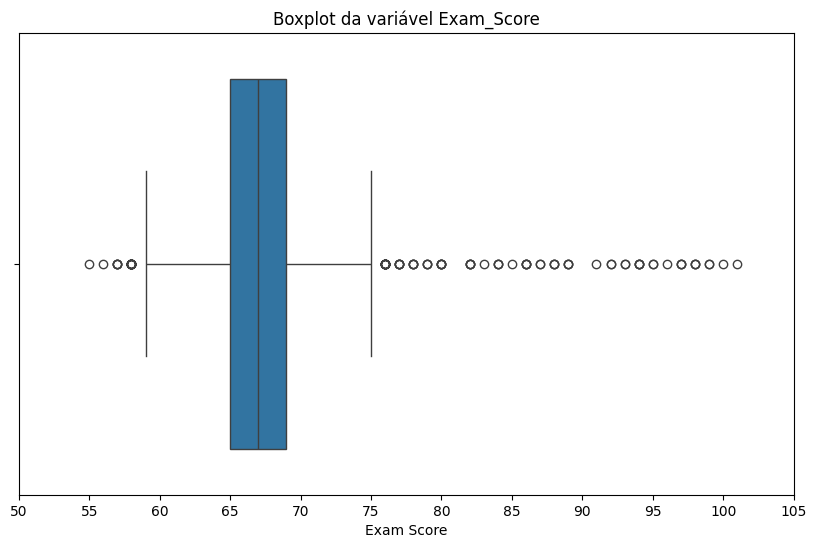

In [ ]:
#
#   Exploração da variável Exam_Score com o gráfico boxplot
#
plt.figure(figsize=(10, 6))
sns.boxplot(x=stdperf['Exam_Score'])
plt.title('Boxplot da variável Exam_Score')
plt.xlabel('Exam Score')

# Definir os ticks do eixo x de 5 em 5
plt.xticks(ticks=range(50, int(stdperf['Exam_Score'].max()) + 5, 5))

plt.show()

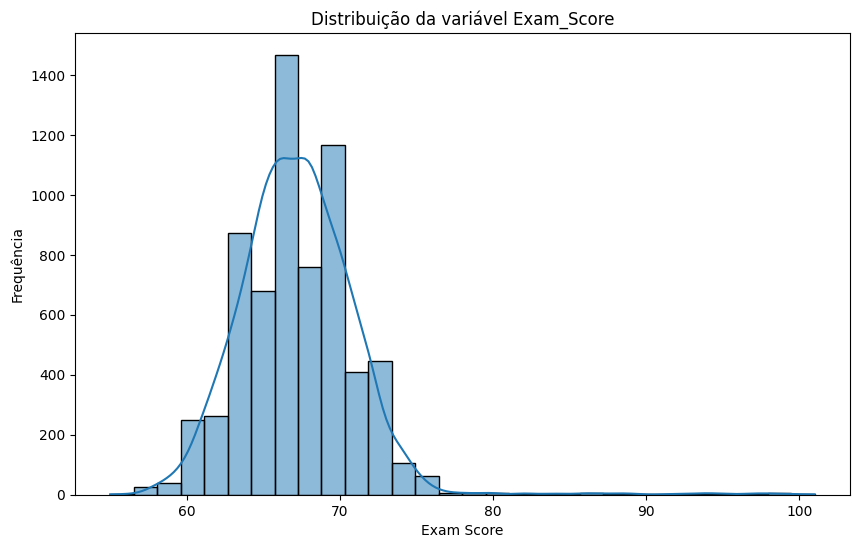

In [ ]:
#
#   Histograma da variável Exam_Score
#
plt.figure(figsize=(10, 6))
sns.histplot(stdperf['Exam_Score'], bins=30, kde=True)
plt.title('Distribuição da variável Exam_Score')
plt.xlabel('Exam Score')
plt.ylabel('Frequência')
plt.show()

In [ ]:
#
#   Ordenando o dataframe por uma coluna
#
stdperf.sort_values(by='Exam_Score')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1101,3,62,Medium,Low,No,6,67,Medium,Yes,1,Low,Medium,Public,Negative,3,No,High School,Near,Male,55
5507,5,65,Low,High,No,7,71,Medium,Yes,0,Low,Medium,Private,Negative,2,No,College,Far,Male,56
2880,7,66,High,Low,Yes,8,68,High,Yes,0,Low,Medium,Public,Negative,2,Yes,College,Moderate,Male,57
3543,14,67,Low,Low,Yes,7,66,Low,Yes,0,Low,Medium,Public,Neutral,4,No,High School,Far,Female,57
5719,9,64,Medium,Low,Yes,10,68,Low,Yes,0,Medium,Medium,Private,Negative,3,No,High School,Near,Male,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,16,83,Low,Medium,Yes,8,92,Low,Yes,2,High,High,Public,Positive,4,No,Postgraduate,Near,Female,98
3579,14,90,High,High,Yes,8,86,Medium,Yes,4,Medium,Medium,Private,Negative,2,No,High School,Near,Female,99
2425,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100


In [ ]:
#
#
#   Limpeza dos dados
#
#   Contando o número de na values
#
stdperf.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
#
# Observa-se que há algumas linhas com valores nulos.
# Como são poucas linhas em relação ao total, vou eliminá-las:
#
stdperf = stdperf.dropna(how='any')
stdperf.shape


(6377, 20)

In [ ]:
#
#   Verificando o número de na values
#
stdperf.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
#
#   Nota-se que a variável Exam_Score possui valor máximo acima 100, que é um
#   valor incorreto. Vamos verificar quais registros estão com valor incorreto.
#   Selecionando linhas com Exam_score > 100
#
stdperf[stdperf['Exam_Score'] > 100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [ ]:
#
#  Como só há uma linha com a variável Exam_Score, será eliminada do dataframe.
#
stdperf = stdperf.drop(1525)
stdperf[stdperf['Exam_Score'] > 100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


In [ ]:
#
#  Removendo linhas duplicadas, caso existam
#
stdperf = stdperf.drop_duplicates()
stdperf.shape
stdperf.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
#
#   Verificando a quantidade de linhas por coluna atual
#
stdperf.count()

,0
Hours_Studied,6377
Attendance,6377
Parental_Involvement,6377
Access_to_Resources,6377
Extracurricular_Activities,6377
Sleep_Hours,6377
Previous_Scores,6377
Motivation_Level,6377
Internet_Access,6377
Tutoring_Sessions,6377


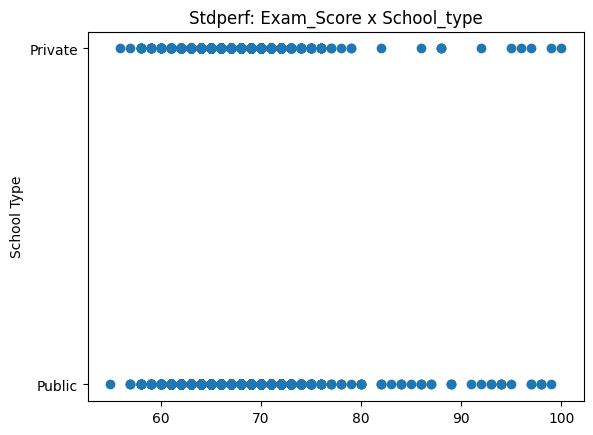

In [ ]:
#
#   Visualização dos Dados
#
#   Plotando o gráfico de Score x Tipo de escola
#
plt.scatter(stdperf['Exam_Score'], stdperf['School_Type'])

# incluindo título do gráfico e rótulos dos eixos
plt.title('Stdperf: Exam_Score x School_type')
plt.xlabel('')
plt.ylabel('School Type');

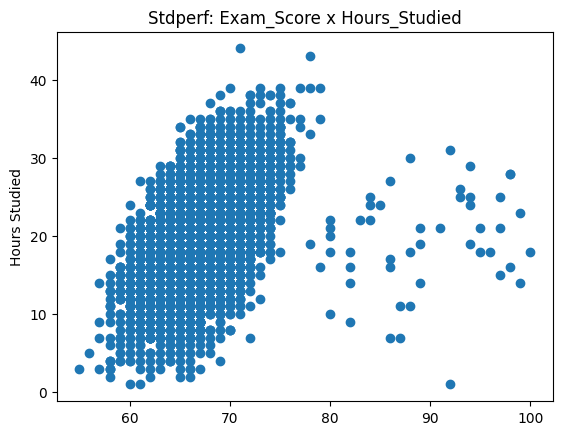

In [ ]:
# plotando o gráfico de Score x Horas de estudo
plt.scatter(stdperf['Exam_Score'], stdperf['Hours_Studied'])

# incluindo título do gráfico e rótulos dos eixos
plt.title('Stdperf: Exam_Score x Hours_Studied')
plt.xlabel('')
plt.ylabel('Hours Studied');

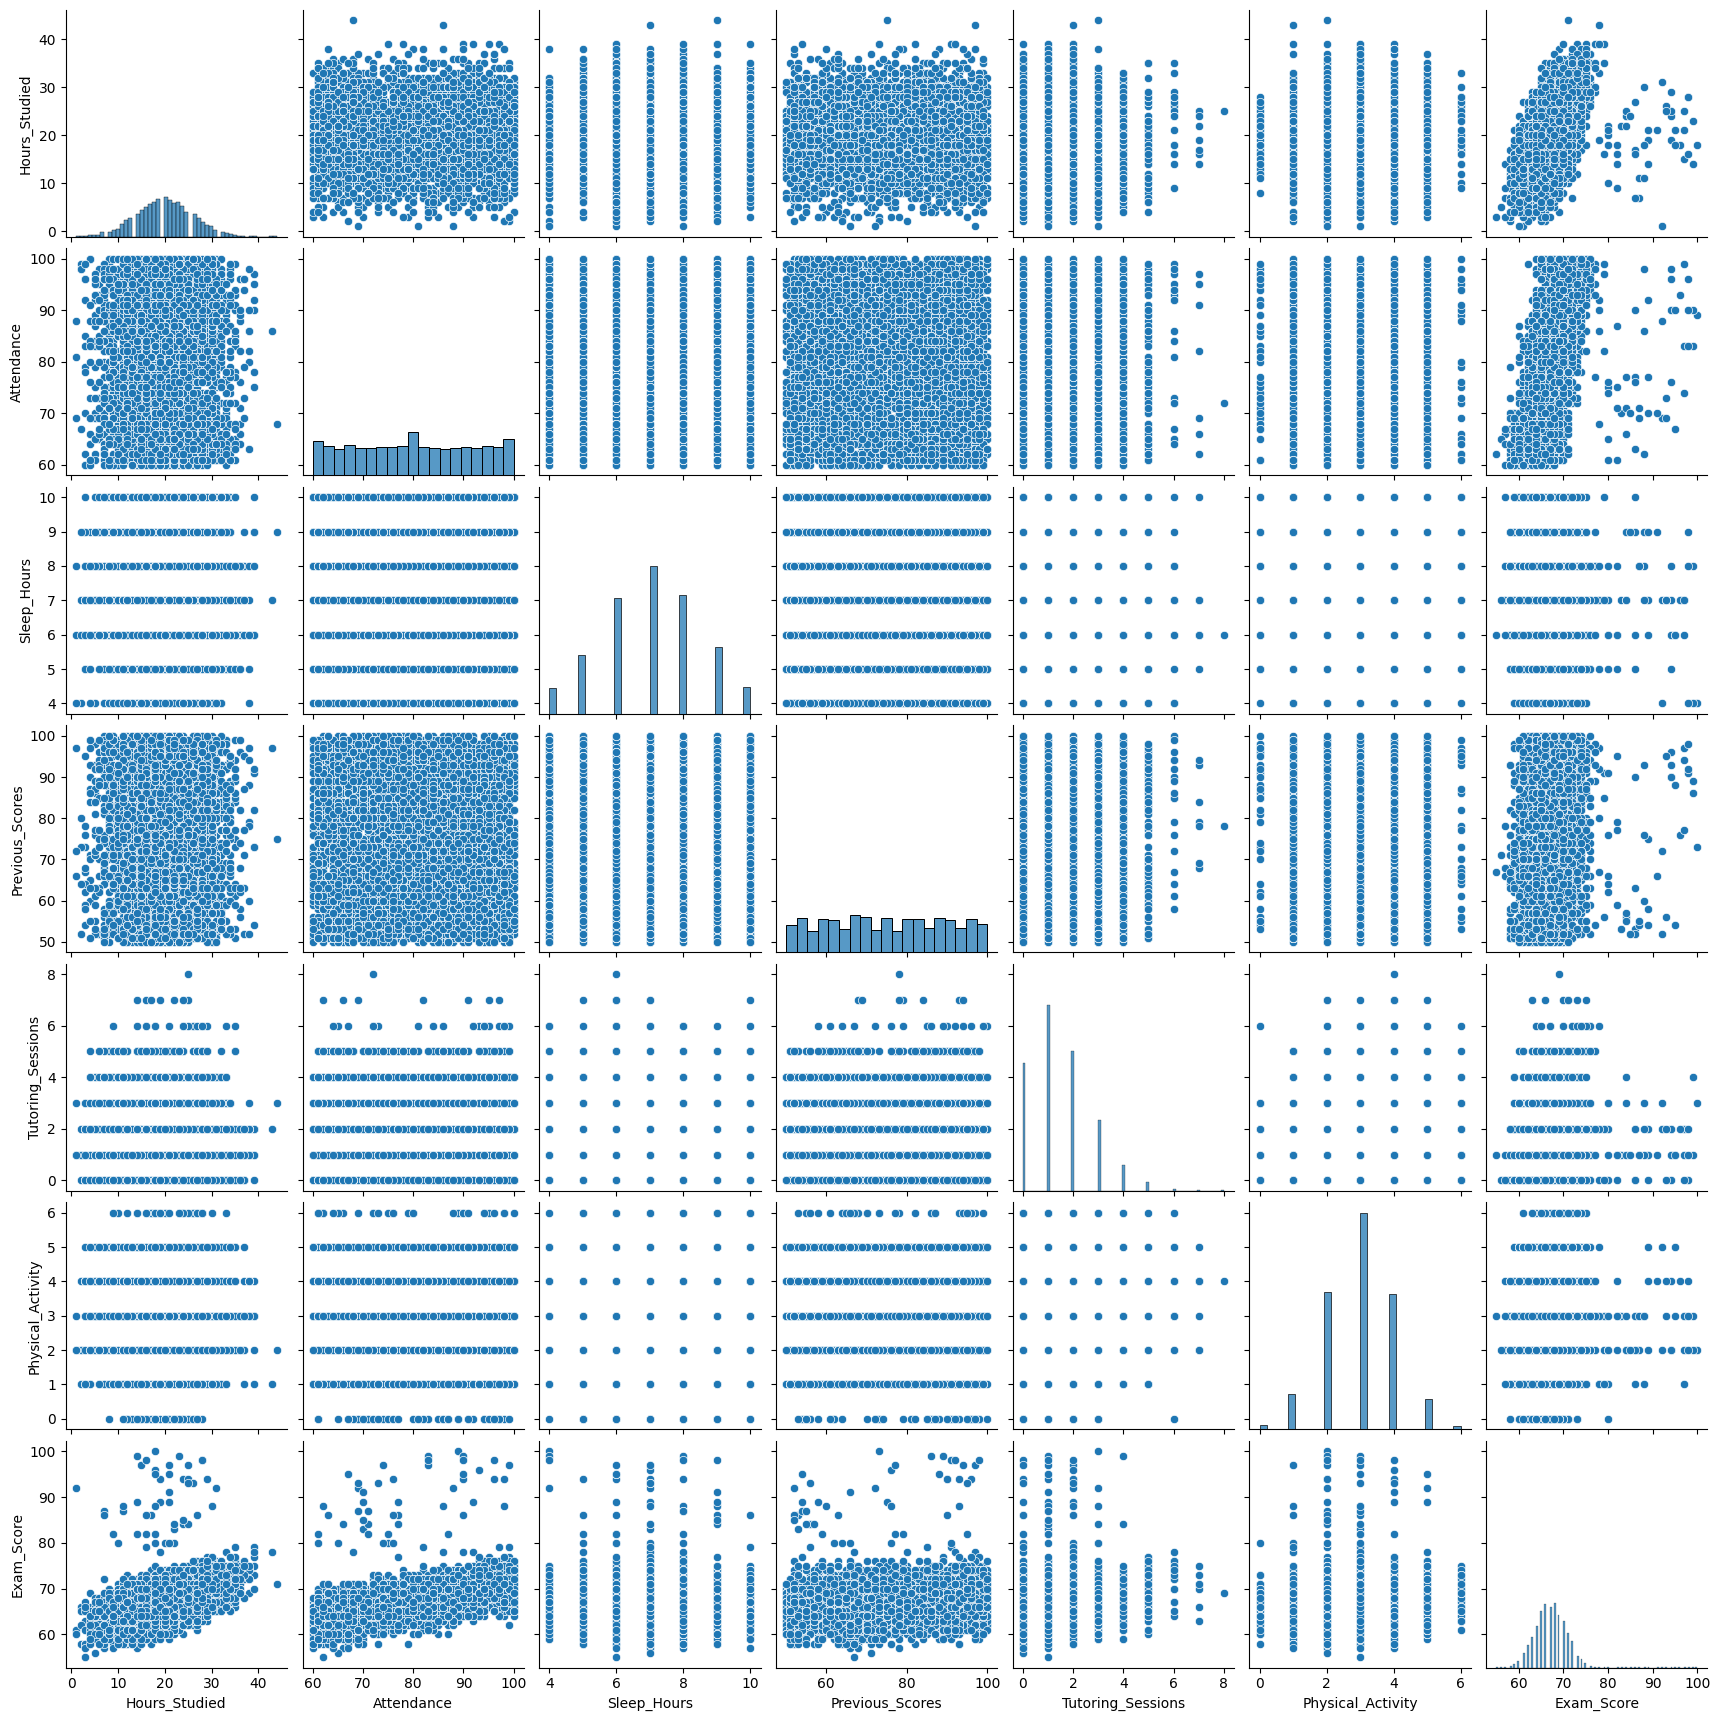

In [ ]:
# pair plot 1 com Seaborn
sns.pairplot(stdperf);


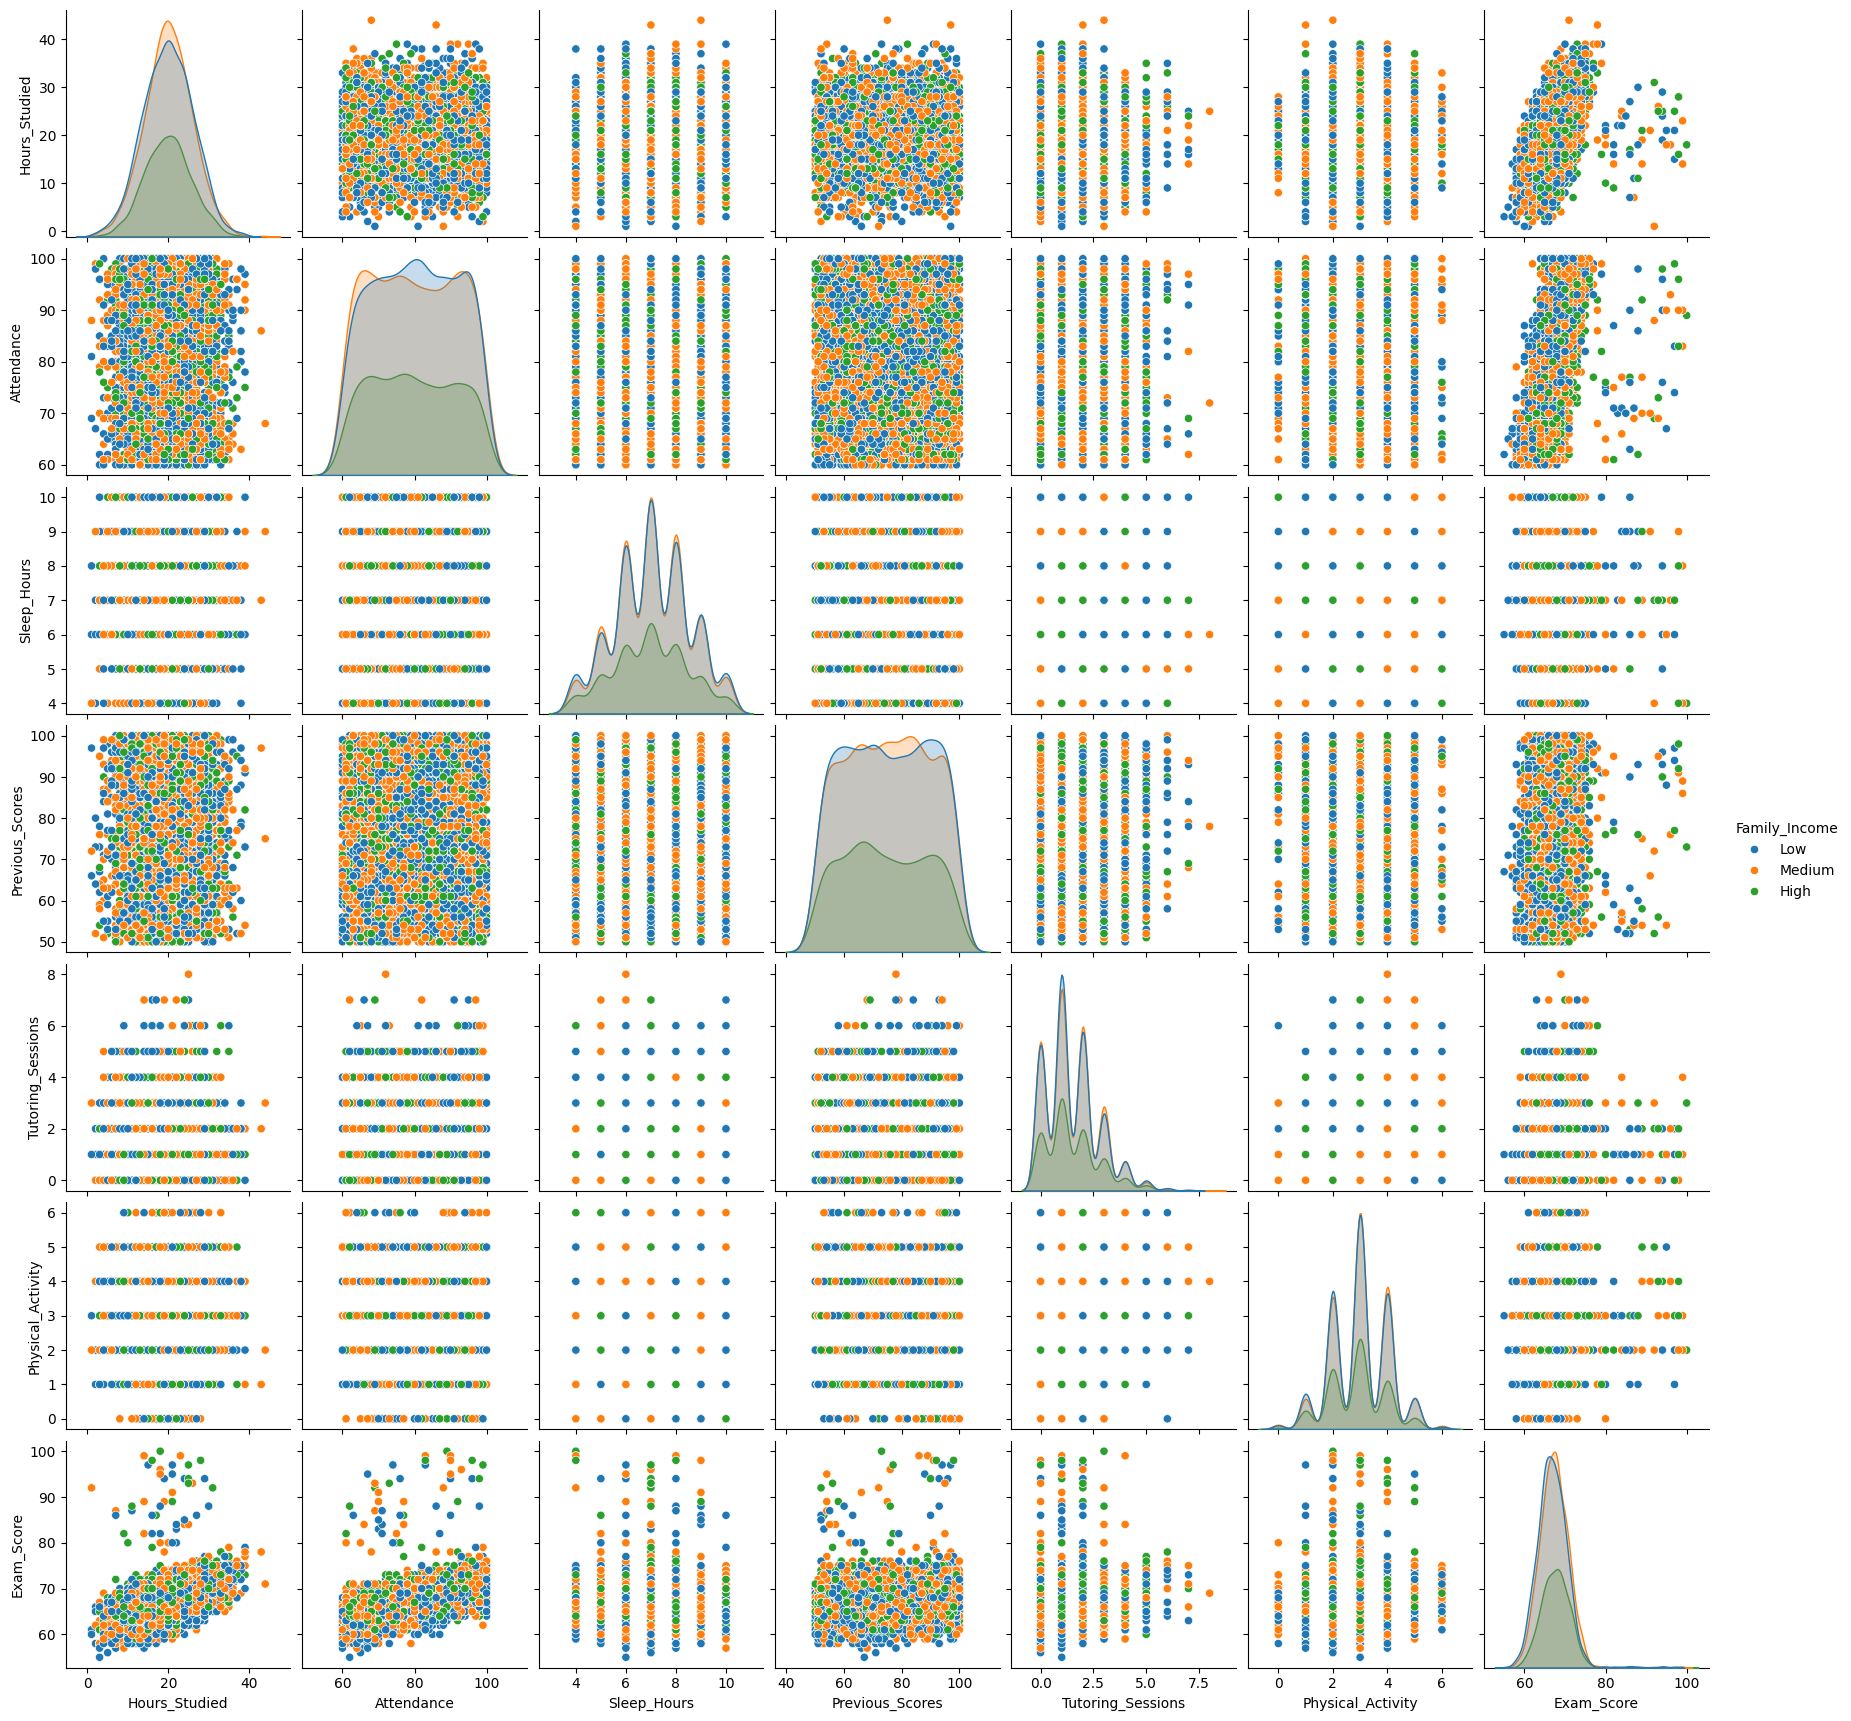

In [ ]:
# pair plot 2 com Seaborn
sns.pairplot(stdperf,hue = "Family_Income");
#
#   A média da nota do exame de pessoas de renda mais alta tende a ser um pouco
#   maior que as demais e com um número menor notas baixas.
#

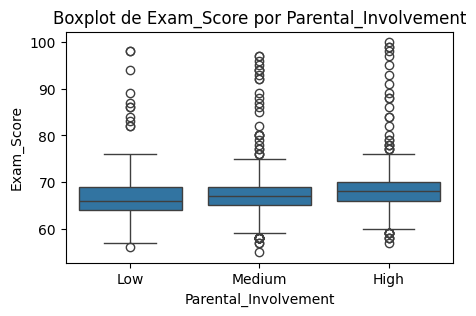

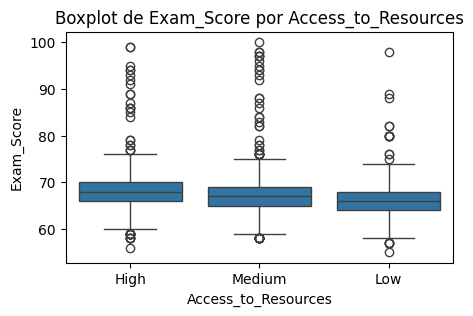

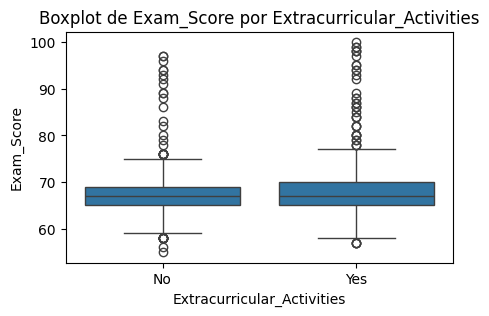

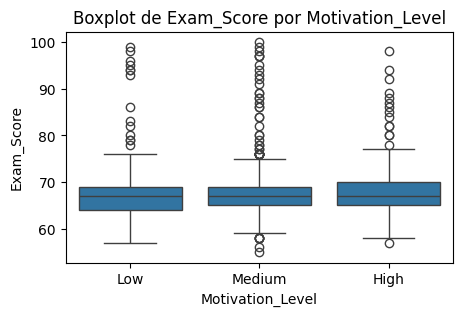

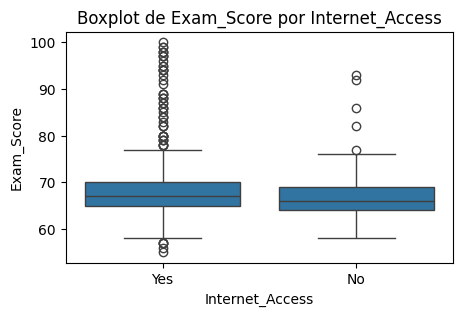

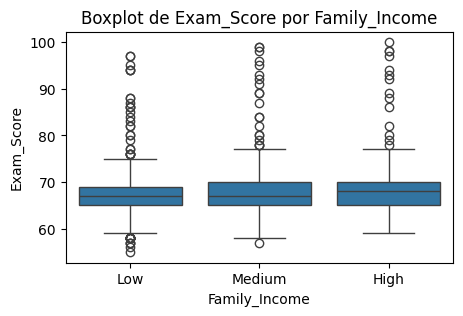

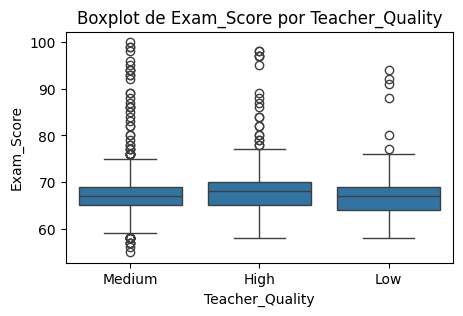

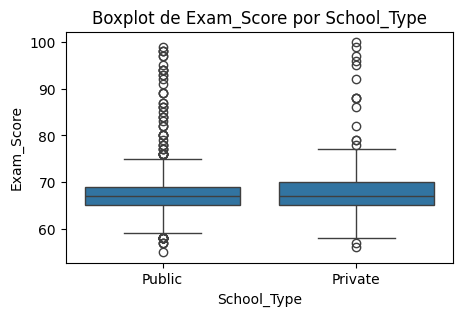

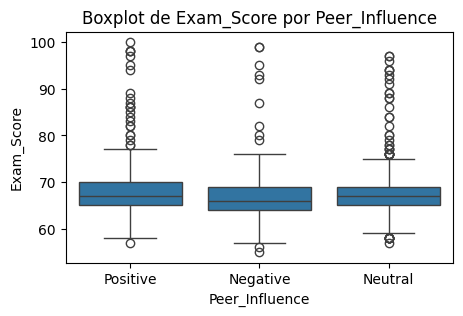

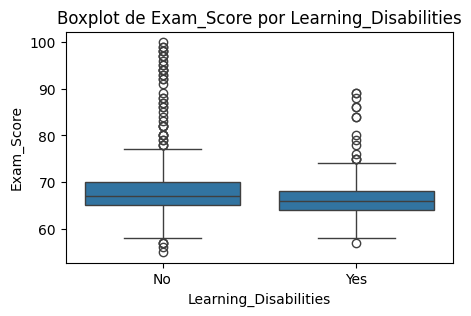

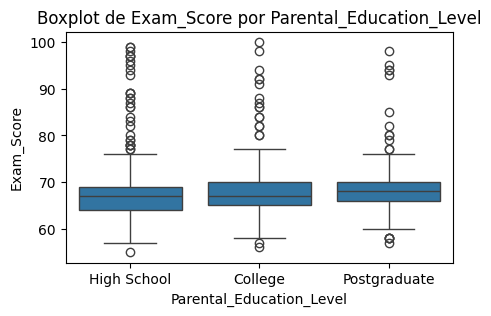

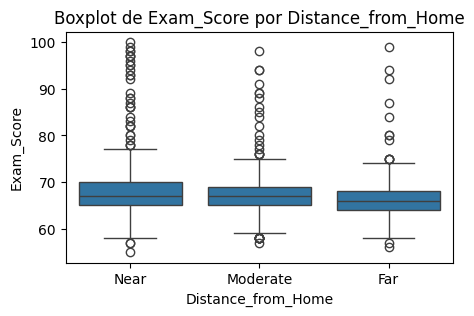

In [ ]:
#
#   Visualização da variável de estudo ("Exam_Score") e as variáveis categóricas
#   Desconsiderei a variável "Gender"
#
# boxplot com Seaborn

qualitative_vars = ['Parental_Involvement', 'Access_to_Resources',
                    'Extracurricular_Activities', 'Motivation_Level',
                    'Internet_Access', 'Family_Income', 'Teacher_Quality',
                    'School_Type','Peer_Influence', 'Learning_Disabilities',
                    'Parental_Education_Level', 'Distance_from_Home']

for q_var in qualitative_vars:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=q_var, y='Exam_Score', data=stdperf)
    plt.title(f'Boxplot de Exam_Score por {q_var}')
    plt.xlabel(q_var)
    plt.ylabel('Exam_Score')
    plt.show()

<Axes: >

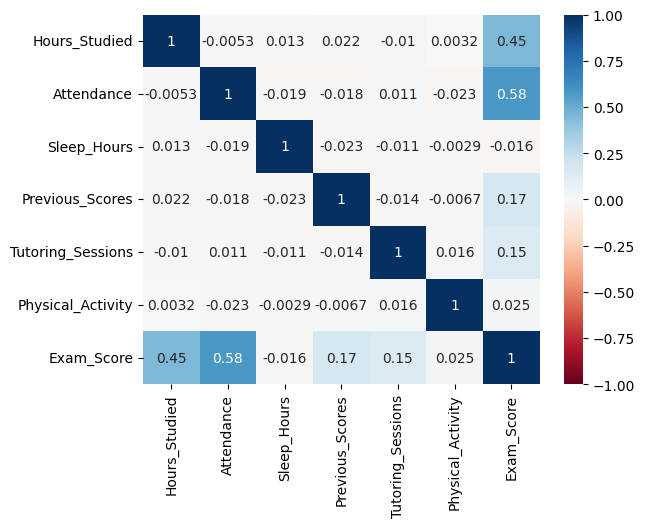

In [ ]:
#   Visualização das variável de estudo ("Exam_Score") e as variáveis numéricas
#
# gráfico de correlação com Seaborn
#
# Selecionar apenas as colunas quantitativas para calcular a correlação
quantitative_vars = stdperf.select_dtypes(include=np.number)
#
# Calcular a matriz de correlação
correlation_matrix = quantitative_vars.corr()
#
# Plotar o heatmap utilizando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)

In [ ]:
#
#   Observamos que as variáveis quantitativas Hours_Studied (horas de estudo), Attendance (frequência) são
#   bem correlacionadas com a variável "target" Exam_Socore. Em menor importância, a variável Previous_Scores
#   também apresenta uma certa correlação.
#

In [ ]:
#   Transformação Numérica
#
#   Normalizando os dados
#
cols_numericas = ['Hours_Studied', 'Attendance', 'Sleep_Hours',
       'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
# encoded_cols = MinMaxScaler().fit_transform(X[cols_numericas])

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()
rescaled = stdperf.copy()  # fazendo um cópia do dataframe
# Aplicar o scaler nas colunas selecionadas
# X[cols_numericas] = scaler.fit_transform(X[cols_numericas])
rescaled[cols_numericas] = scaler.fit_transform(rescaled[cols_numericas])
# Exibindo os dados transformados
print("Dados Originais: \n\n", stdperf)
print("\nDados Normalizados (não inclui a coluna Exam_Score): \n\n", rescaled)



Dados Originais: 

       Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0 

In [ ]:
#
#   Transfomação Categórica
#
# Selecionar as colunas categóricas que deseja-se transformar
#
cols_quali = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
                 'Family_Income', 'Teacher_Quality','Internet_Access', 'School_Type',
                  'Peer_Influence', 'Extracurricular_Activities',
                 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home']
#
# Inicializar o OrdinalEncoder
encoded = rescaled.copy()
encoded[cols_quali] = OrdinalEncoder().fit_transform(encoded[cols_quali])
#
# exibindo os dados transformados
print("Atributos transformados:")
# print(encoded[:5, :]) # 5 primeiras linhas, todas as colunas
print(encoded)
#

Atributos transformados:
      Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0          0.511628       0.600                   1.0                  0.0   
1          0.418605       0.100                   1.0                  2.0   
2          0.534884       0.950                   2.0                  2.0   
3          0.651163       0.725                   1.0                  2.0   
4          0.418605       0.800                   2.0                  2.0   
...             ...         ...                   ...                  ...   
6602       0.558140       0.225                   0.0                  2.0   
6603       0.511628       0.400                   0.0                  2.0   
6604       0.441860       0.750                   2.0                  1.0   
6605       0.209302       0.650                   0.0                  0.0   
6606       0.325581       0.175                   2.0                  1.0   

      Extracurricular_Activities  Slee

In [ ]:
#
#   Separando o array em componentes de input e output
#   Esses dados podem ser utilizados no Aprendizado Supervisionado de Machine
#   Learning (regressão), onde poderiam ser feitas previsões a respeito do
#   desempenho de determinado aluno (Y), de acordo com informações fornecidas
#   sobre o aluno (X)
#
X = encoded.values[:,0:18]
Y = encoded.values[:,19]
print(X)

[[0.5116279069767441 0.6000000000000001 1.0 ... 0.0 1.0 2.0]
 [0.4186046511627907 0.10000000000000009 1.0 ... 0.0 0.0 1.0]
 [0.5348837209302325 0.9500000000000002 2.0 ... 0.0 2.0 2.0]
 ...
 [0.4418604651162791 0.75 2.0 ... 0.0 2.0 2.0]
 [0.20930232558139533 0.6499999999999999 0.0 ... 0.0 1.0 0.0]
 [0.32558139534883723 0.17500000000000004 2.0 ... 0.0 2.0 2.0]]
